# Methods I: Programming and Data Analysis

## Session 13: Recursion; Jupyter notebooks; NumPy

### Gerhard Jäger

#### (based on Johannes Dellert's slides)

February 1, 2022

# Recursion

A central concept of programming: **recursion**

-   informally: a definition or function which refers to itself

-   can be used whenever a problem (e.g. finding all sources of a river)
    can be reduced to subproblems of the same type\
    (e.g. finding the sources of a tributary)

-   all loops can be implemented using recursion!

-   every recursive function can be implemented using iteration!

-   BUT: there are many problems for which either iteration or recursion
    is more efficient, or easier to implement

### Base Case and Recursive Cases

In computing, recursive definitions need to consist of two parts:

-   the **base case** covers the simplest instances of a problem, and
    does not refer to the concept being defined (ensures termination)

-   the **recursive case** refers to the concept being defined when
    describing substructures (expansion to structures of arbitrary size)

There is a close relationship between recursion and mathematical
induction!

-   In induction, you prove that a theorem holds e.g. for $n = 1$ (the
    base case), and that it holds for $n = k + 1$ if it already holds
    for $n = k$ (recursive case).

-   If you want to prove that a recursive algorithm gives the correct
    result, you need induction as a proof technique!

### Recursive Definitions

Using recursion in definitions:

-   **recursive definition**: a definition which uses the term it
    defines

-   Example: defining (a subset of) boolean expressions in Python

    -   the expressions `True` and `False` are boolean expressions (base
        case)

    -   an expression of the form `a == b` is a boolean expression (base
        case)

    -   two boolean expressions conjoined by `and` form a boolean
        expression (recursive case)

    -   two boolean expressions conjoined by `or` form a boolean
        expression (recursive case)

    -   a boolean expression preceded by `not` is a boolean expression\
        (recursive case)

-   you have probably seen recursive definitions in logic!

### Recursive Functions

Using recursion in function definitions:

-   **recursive function**: a function which calls itself

-   if the function calls itself on every input, we get **infinite
    recursion**

-   in all useful recursive functions, each nested call differs in its
    arguments (e.g. execution on subproblems)

-   for recursive functions to terminate, we need base cases!

### Recursion vs. Iteration

-   in principle, recursion and iteration are equally powerful\
    (one can be used to emulate the other)

-   however, there are many definitions and algorithms which are much
    easier to write using recursion

-   this is especially the case for processing data structures which
    contain substructures of varying size (i.e. data that is not tabular
    in shape)

-   Examples:

    -   processing syntax trees for programming languages (in a
        compiler) and natural languages (in a parser)

    -   processing more general graph structures like networks

    -   sorting and searching in structures that are more complex than
        lists or dictionaries (e.g. 3-D models)

-   We are going to use navigation through trees as our main example!

# Implementing Trees
---------------

### Tree Structures in Linguistics

Trees are ubiquitous in linguistics:

-   syllable structure trees

-   word structure trees

-   phrase structure trees

-   dependency trees

-   derivation trees

-   formula structure trees

### Tree Structures in Programming

Trees are one of the most important data structures in computer science:

-   the best way to maintain sorted records

-   efficient retrieval and insertion of elements

Important application areas where trees arise:

-   directory structure on a file system

-   program execution gives rise to call trees

-   software packages depend on each other in a tree shape

-   the search space of many algorithms is tree-shaped

### Modeling Nodes

Developing a simple tree class:

-   each tree node should be the instance of a class `Node`

-   the contents of a node (e.g. the category label in a syntax tree)
    should be stored as an instance variable

-   references to the children of the current node are stored in an
    additional instance variable as a list (order matters!)

-   a leaf node is modeled by empty children list

-   the result is an example of a **recursive data structure**

Actually, each `Node` corresponds to the `Tree` of which it forms the
root!

###  Modeling A Tree

In [1]:
class Tree(object):
    def __init__(self, name='root', children=None):
        self.name = name
        self.children = []
        self.parent = None
        if children is not None:
            for child in children:
                self.add_child(child)
                child.parent = sel

    def add_child(self, node):
        assert isinstance(node, Tree)#        self.children.append(node)

Notes:

-   additional parent pointer makes upward navigation easier

-   the trivial `Tree` does not have children,\
    representing a single node with the label `"root"`

### Tree Traversal

Traversals are an important part of processing trees:

-   a **traversal** defines the order in which the nodes of a tree are
    processed

-   three logical possibilities:

    -   **in-order** traversal (left child first, parent, then other
        children)

    -   **pre-order** traversal (parent first, then children from left
        to right)

    -   **post-order** traversal (children from left to right, then
        parent)

-   all three variants are easiest to implement as recursive functions




### In-Order Traversal

![image.png](_img/tree1.svg)

In which order are nodes visited by an in-order traversal?

### In-Order Traversal: Solution

![image.png](_img/tree1.svg)


Solution: B, A, F, D, G, H, C, E

### In-Order Traversal: Code

Implementation within the `Tree` class:

In [2]:
def inorder(self):
    """In-order traversal:
    First recurse into left child, then visit the node itself, 
    then recurse into other children in order.
    
    :return: A list of tree nodes in in-order."""
    result = []
    if len(self.children) > 0:
        result += self.children[0].inorder()
    result.append(self)
    for i in range(1,len(self.children)):
        result += self.children[i].inorder()
    return result

### Pre-Order Traversal

![image.png](_img/tree1.svg)

In which order are nodes visited by a pre-order traversal?

### Pre-Order Traversal: Solution
![image.png](_img/tree1.svg)

Solution: A, B, C, D, F, G, H, E


### Post-Order Traversal

![image.png](_img/tree1.svg)

In which order are nodes visited by a pre-order traversal?

### Post-Order Traversal: Solution

![image.png](_img/tree1.svg)

Solution: B, F, G, H, D, E, C, A

### Jupyter notebooks

-   browser-based environment for interactive computation

-   relies on a *kernel* for the programming language you want to use

-   there are kernels for Python, R, Julia etc.



-   at the command prompt, type `jupyter notebook`

-   a browser window will open

-   select **new**, and then **Python 3**

-   the text window acts like a Python console, but you can enter
    multiple lines

-   Jupyter notebooks are great for data analysis

-   for actual programming, it is better to use PyCharm or something
    similar

# The NumPy library

(see http://cs231n.github.io/python-numpy-tutorial/ and https://docs.scipy.org/doc/numpy/user/quickstart.html)

<sub>Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. 

## Arrays

<sub>A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [3]:
import numpy as np

In [4]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


## An example

In [5]:
a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [6]:
a.shape

(3, 5)

In [7]:
a.ndim

2

In [8]:
a.dtype.name

'int64'

In [9]:
a.itemsize

8

In [10]:
a.size

15

In [11]:
type(a)

numpy.ndarray

In [12]:
b = np.array([6, 7, 8])
b

array([6, 7, 8])

In [13]:
type(b)

numpy.ndarray

## Creating arrays

There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [14]:
a = np.array([2, 3, 4])
print(a)

[2 3 4]


In [15]:
a.dtype

dtype('int64')

In [16]:
b = np.array([1.2, 3.5, 5.1])
b.dtype

dtype('float64')

`array` transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [17]:
b = np.array([(1.5, 2, 3), (4, 5, 6)])
print(b)

[[1.5 2.  3. ]
 [4.  5.  6. ]]


The type of the array can also be explicitly specified at creation time:

In [18]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
print(c)

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]


Often, the elements of an array are originally unknown, but its size is known. Hence, NumPy offers several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

The function `zeros` creates an array full of zeros, the function `ones` creates an array full of ones, and the function empty creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is `float64`.

In [19]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [20]:
np.ones((2,3,4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [21]:
np.empty((2,3))

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

To create sequences of numbers, NumPy provides a function analogous to `range` that returns arrays instead of lists.

In [22]:
np.arange( 10, 30, 5 )

array([10, 15, 20, 25])

In [23]:
np.arange( 0, 2, 0.3 )  

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

When `arange` is used with floating point arguments, it is generally not possible to predict the number of elements obtained, due to the finite floating point precision. For this reason, it is usually better to use the function `linspace` that receives as an argument the number of elements that we want, instead of the step:

In [24]:
np.linspace( 0, 2, 9 )                 # 9 numbers from 0 to 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

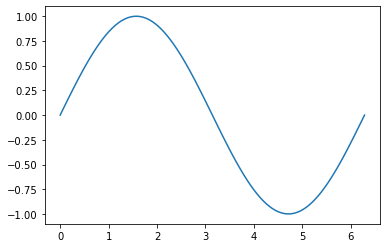

In [25]:
from numpy import pi
from matplotlib import pyplot as plt

x = np.linspace( 0, 2*pi, 100 )        # useful to evaluate function at lots of points
f = np.sin(x)
plt.plot(x, f)

In [26]:
np.array([[[[1,2], [3,4], [5,6]], 
          [[1,2], [3,4], [5,6]]],
         [[[1,2], [3,4], [5,6]], 
          [[1,2], [3,4], [5,6]]]
         ])

array([[[[1, 2],
         [3, 4],
         [5, 6]],

        [[1, 2],
         [3, 4],
         [5, 6]]],


       [[[1, 2],
         [3, 4],
         [5, 6]],

        [[1, 2],
         [3, 4],
         [5, 6]]]])

## Printing Arrays

When you print an array, NumPy displays it in a similar way to nested lists, but with the following layout:
- the last axis is printed from left to right,
- the second-to-last is printed from top to bottom,
- the rest are also printed from top to bottom, with each slice separated from the next by an empty line.

One-dimensional arrays are then printed as rows, bidimensionals as matrices and tridimensionals as lists of matrices

In [27]:
import numpy as np
a = np.arange(6)
print(a)

[0 1 2 3 4 5]


In [28]:
b = np.arange(12).reshape(4,3)
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [29]:
c = np.arange(24).reshape(2,3,4)
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


If an array is too large to be printed, NumPy automatically skips the central part of the array and only prints the corners:

In [30]:
print(np.arange(10000))

[   0    1    2 ... 9997 9998 9999]


In [31]:
print(np.arange(10000).reshape(100, 100))

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


## Basic operations

Arithmetic operators on arrays apply *elementwise*. A new array is created and filled with the result.

In [33]:
a = np.array([20,30,40,50], dtype=int)
b = np.arange(4)
c = a*b
print(c)

[  0  30  80 150]


In [34]:
print(b**2)

[0 1 4 9]


In [35]:
print(10*np.sin(a))

[ 9.12945251 -9.88031624  7.4511316  -2.62374854]


In [36]:
print(a<35)

[ True  True False False]


Some operations, such as `+=` and `*=`, act in place to modify an existing array rather than create a new one.

In [37]:
a = np.ones((2,3))
b = np.random.random((2,3))
a *= 3
print(a)

[[3. 3. 3.]
 [3. 3. 3.]]


In [38]:
b += a
print(b)

[[3.70459733 3.3528022  3.76786521]
 [3.95425461 3.58611385 3.95951058]]


When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as upcasting).

In [40]:
from math import pi
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, pi, 3)
b.dtype.name

'float64'

In [41]:
a.dtype

dtype('int32')

In [42]:
c = a+b
c

array([1.        , 2.57079633, 4.14159265])

In [43]:
c.dtype.name

'float64'

In [44]:
d = np.exp(c*1j)

In [45]:
d.dtype.name

'complex128'

Many unary operations, such as computing the sum of all the elements in the array, are implemented as methods of the `ndarray` class.

In [46]:
a = np.random.random((2,3))
a

array([[0.3243932 , 0.09482076, 0.02030006],
       [0.60275048, 0.54043824, 0.91164518]])

In [47]:
a.sum()

2.494347913918455

In [48]:
a.min()

0.020300057915424552

In [49]:
a.max()

0.9116451789128676

By default, these operations apply to the array as though it were a list of numbers, regardless of its shape. However, by specifying the `axis` parameter you can apply an operation along the specified axis of an array:

In [50]:
b = np.arange(12).reshape(3,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
b.sum(axis=0)

array([12, 15, 18, 21])

In [52]:
b.min(axis=1)

array([0, 4, 8])

In [53]:
np.arange(5).cumsum()

array([ 0,  1,  3,  6, 10])

In [54]:
b.cumsum(axis=1)

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

## Universal Functions

NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called “universal functions”(`ufunc`). Within NumPy, these functions operate elementwise on an array, producing an array as output.

In [55]:
B = np.arange(3)
B

array([0, 1, 2])

In [56]:
np.exp(B)

array([1.        , 2.71828183, 7.3890561 ])

In [57]:
np.sqrt(B)

array([0.        , 1.        , 1.41421356])

In [58]:
C = np.array([2., -1., 4.])
np.add(B, C)

array([2., 0., 6.])

## Indexing, Slicing and Iterating

**One-dimensional** arrays can be indexed, sliced and iterated over, much like lists and other Python sequences.

In [59]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [60]:
a[2]

8

In [61]:
a[2:5]

array([ 8, 27, 64])

In [62]:
a[:6:2] = -1000
a

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,
         729])

In [63]:
a[: :-1]

array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1,
       -1000])

In [64]:
for i in a:
    print(i**(1/3.))

nan
1.0
nan
3.0
nan
4.999999999999999
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


/tmp/ipykernel_9410/2421933163.py:2: RuntimeWarning: invalid value encountered in power
  print(i**(1/3.))


**Multidimensional** arrays can have one index per axis. These indices are given in a tuple separated by commas:

In [65]:
def f(x,y):
    return 10*x+y

b = np.fromfunction(f,(5,4),dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [66]:
b[2,1]

21

In [67]:
b[0:5,1]

array([ 1, 11, 21, 31, 41])

In [68]:
b[:,1]

array([ 1, 11, 21, 31, 41])

In [69]:
b[1:3, :]

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

When fewer indices are provided than the number of axes, the missing indices are considered complete slices:

In [70]:
b[-1]

array([40, 41, 42, 43])

**Iterating** over multidimensional arrays is done with respect to the first axis:

In [71]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


# Pandas

Pandas is a package that offers an improved interface for numpy arrays. You can add names for rows and column, easily compute summary statistics, plot them etc.

Pandas defines a datatype *dataframe*, which is similar in functionality to R's data frames.

(Some of the following material is taken from https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

In [72]:
import pandas as pd

In [73]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

Data frames can be created from lists, numpy arrays or dictionaries. In the latter case, the keys of the dictionary are re-used as column names.

In [74]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


Using the `index` keyword, you can add row names.

In [75]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Individual rows or columns can be accessed using the corresponding names.

In [76]:
purchases['apples']

June      3
Robert    2
Lily      0
David     1
Name: apples, dtype: int64

In [77]:
purchases.loc['Robert']

apples     2
oranges    3
Name: Robert, dtype: int64

Pandas data frames can be easily wrote into and read from csv files (besides a host of other file types).

In [78]:
purchases.to_csv("purchases.csv")

In [79]:
pd.read_csv("purchases.csv", index_col=0)

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [81]:
#! wget http://www.sfs.uni-tuebingen.de/~jdellert/northeuralex/0.9/northeuralex-0.9-forms.tsv

--2022-01-29 09:15:34--  http://www.sfs.uni-tuebingen.de/~jdellert/northeuralex/0.9/northeuralex-0.9-forms.tsv
Resolving www.sfs.uni-tuebingen.de (www.sfs.uni-tuebingen.de)... 134.2.129.121
Connecting to www.sfs.uni-tuebingen.de (www.sfs.uni-tuebingen.de)|134.2.129.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10790091 (10M) [text/tab-separated-values]
Saving to: ‘northeuralex-0.9-forms.tsv’

northeuralex-0.9-fo 100%[===================>]  10.29M  18.5MB/s    in 0.6s    

2022-01-29 09:15:34 (18.5 MB/s) - ‘northeuralex-0.9-forms.tsv’ saved [10790091/10790091]



In [82]:
northeuralex = pd.read_csv("northeuralex-0.9-forms.tsv", sep="\t", error_bad_lines=False)
northeuralex

/home/gjaeger/anaconda3/envs/pythonCourse/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 85358: expected 10 fields, saw 11\n'


,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


In [83]:
northeuralex.head()

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate


In [84]:
northeuralex.head(10000).tail(10)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
9990,sme,nort2671,Linie::N,linnjá,liɲːaː,l i ɲ ɲ a a,li5a,LINA,RVNV,validate
9991,sme,nort2671,Strich::N,sárggis,saːrɡkis,s a a r ɡ k i s,sargkis,SARKKIS,SVRKKVS,validate
9992,sme,nort2671,Abstand::N,gaska,kɑskɑ,k ɑ s k ɑ,kaska,KASKA,KVSKV,validate
9993,sme,nort2671,Entfernung::N,gaska,kɑskɑ,k ɑ s k ɑ,kaska,KASKA,KVSKV,validate
9994,sme,nort2671,Entfernung::N,mátkegaska,maːtkekɑskɑ,m a a t k e k ɑ s k ɑ,matkekaska,MATKEKASKA,MVTKVKVSKV,validate
9995,sme,nort2671,Gegend::N,guovlu,kʊ̯ɔβlʊ,k ʊ ɔ β l ʊ,kuoblu,KYUBLY,KVPRV,validate
9996,sme,nort2671,Gegend::N,duovdda,tʊ̯ɔvdtɑ,t ʊ ɔ v d t ɑ,tuovdta,TYUBTTA,TVWTTV,validate
9997,sme,nort2671,Platz::N,sadji,sɑcːi,s ɑ c c i,saTi,SACI,SVKV,validate
9998,sme,nort2671,Ort::N,báiki,paːjki,p a a j k i,payki,PAJKI,PVJKV,validate
9999,sme,nort2671,Seite::N,bealli,pe̯ælːi,p e æ l l i,peEli,PEELI,PVRV,validate


In [85]:
northeuralex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121613 entries, 0 to 121612
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Language_ID  121613 non-null  object
 1   Glottocode   121613 non-null  object
 2   Concept_ID   121613 non-null  object
 3   Word_Form    121611 non-null  object
 4   rawIPA       121608 non-null  object
 5   IPA          121611 non-null  object
 6   ASJP         121604 non-null  object
 7   List         121588 non-null  object
 8   Dolgo        121611 non-null  object
 9   Next_Step    121613 non-null  object
dtypes: object(10)
memory usage: 9.3+ MB


In [86]:
northeuralex.shape

(121613, 10)

In [87]:
temp_df = northeuralex.append(northeuralex)


In [88]:
temp_df.shape


(243226, 10)

In [89]:
temp_df = temp_df.drop_duplicates()

temp_df.shape


(121613, 10)

In [90]:
northeuralex[["Language_ID", "Concept_ID"]].drop_duplicates().Concept_ID.value_counts()


Freund::N         107
Pilz::N           107
Maus::N           107
Wolf::N           107
linker::A         107
                 ... 
klirren::V         92
Figur::N           91
rauschen::V        91
Geschäft::N        91
beherrschen::V     90
Name: Concept_ID, Length: 1016, dtype: int64

<AxesSubplot:>

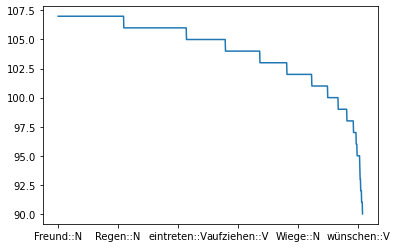

In [91]:
northeuralex[["Language_ID", "Concept_ID"]].drop_duplicates().Concept_ID.value_counts().plot()


<AxesSubplot:>

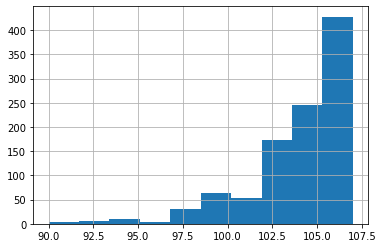

In [92]:
northeuralex[["Language_ID", "Concept_ID"]].drop_duplicates().Concept_ID.value_counts().hist()


<AxesSubplot:>

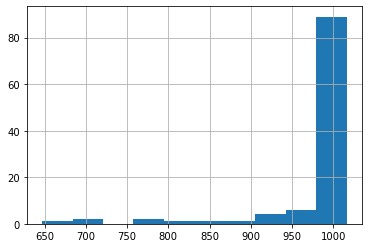

In [93]:
northeuralex[["Language_ID", "Concept_ID"]].drop_duplicates().Language_ID.value_counts().hist()


It is straightforward to split a data frame according to the values in one column and apply certain operations on each value in parallel.

In [94]:
northeuralex.groupby('Glottocode').apply(lambda x: len(x.Concept_ID.unique())).sort_values()


Glottocode
itel1242     647
sout2750     711
gily1242     711
cent2128     766
kett1243     773
            ... 
nort2690    1016
nort2697    1016
basq1248    1016
komi1268    1016
yaku1245    1016
Length: 107, dtype: int64

<AxesSubplot:>

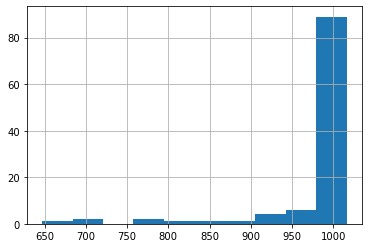

In [95]:
northeuralex.groupby('Glottocode').apply(lambda x: len(x.Concept_ID.unique())).hist()


<AxesSubplot:>

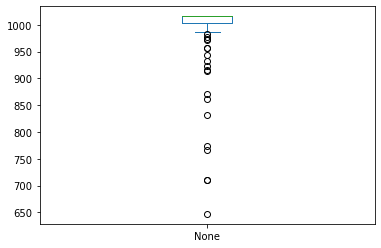

In [96]:
northeuralex.groupby('Glottocode').apply(lambda x: len(x.Concept_ID.unique())).plot(kind="box")